# Convergence study

## Convergence for well potential

(47, 11)


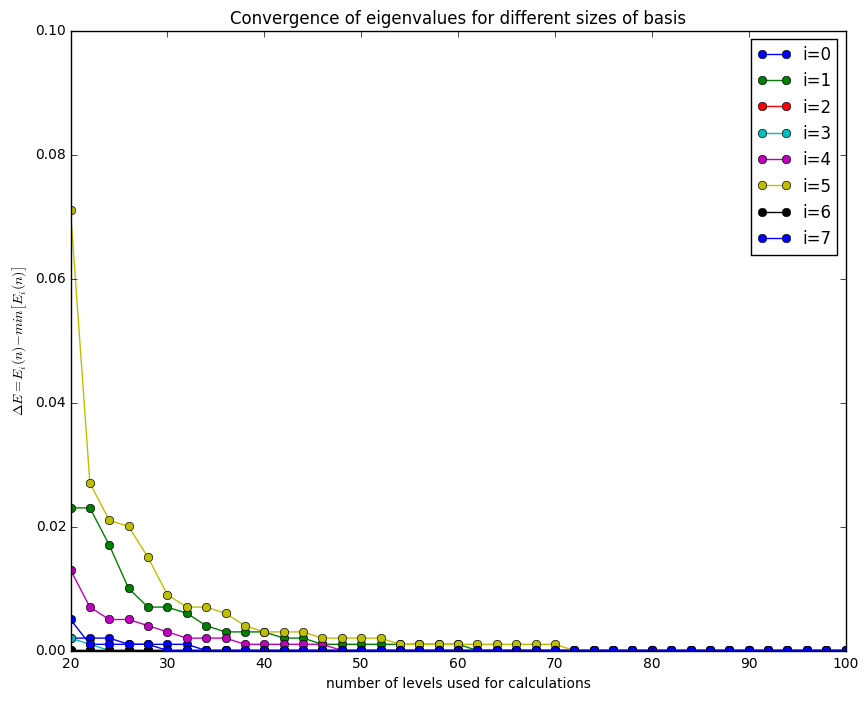

In [1]:
from __future__ import print_function,division

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

data = np.loadtxt('convergence.dat')

print(data.shape)

plt.figure(figsize=[10.,8.])
plt.title('Convergence of eigenvalues for different sizes of basis')
plt.ylabel(r'$\Delta E = E_i(n) - min\left[E_i(n)\right]$')
plt.xlabel('number of levels used for calculations')
plt.ylim([0.,0.1])
#plt.ylim([1e-15,0.01])
#plt.yscale('log')
for ii in range(data.shape[1]-3):
    plt.plot(data[6:,0],data[6:,ii+1]-np.min(data[6:,ii+1])+1e-15,marker='o',label='i={}'.format(ii))
plt.legend(loc='upper right')
plt.show()

## Convergence for Fermi potential

(47, 11)


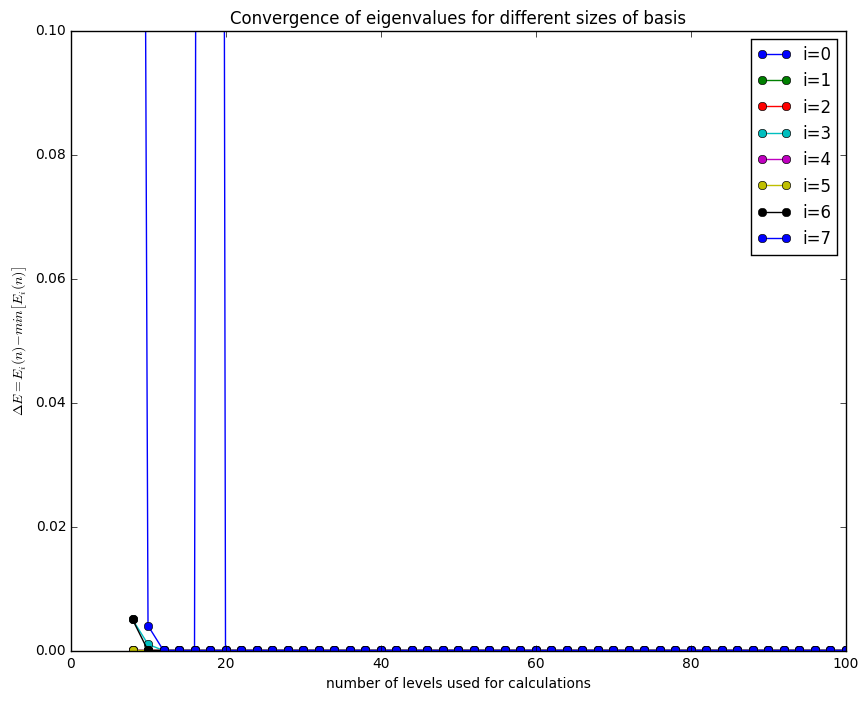

In [27]:
from __future__ import print_function,division

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

data = np.loadtxt('fremi_convergence.dat')

print(data.shape)

plt.figure(figsize=[10.,8.])
plt.title('Convergence of eigenvalues for different sizes of basis')
plt.ylabel(r'$\Delta E = E_i(n) - min\left[E_i(n)\right]$')
plt.xlabel('number of levels used for calculations')
plt.ylim([0.,0.1])
#plt.ylim([1e-15,0.01])
#plt.yscale('log')
for ii in range(data.shape[1]-3):
    plt.plot(data[:,0],data[:,ii+1]-np.min(data[:,ii+1])+1e-15,marker='o',label='i={}'.format(ii))
plt.legend(loc='upper right')
plt.show()

Convergence in case of Fermi potential is better because of "softer edges" - we need more elements in Fourier series to thoroughly express rectangle well.

# Energy levels

Results of computations for nlevels = 30.

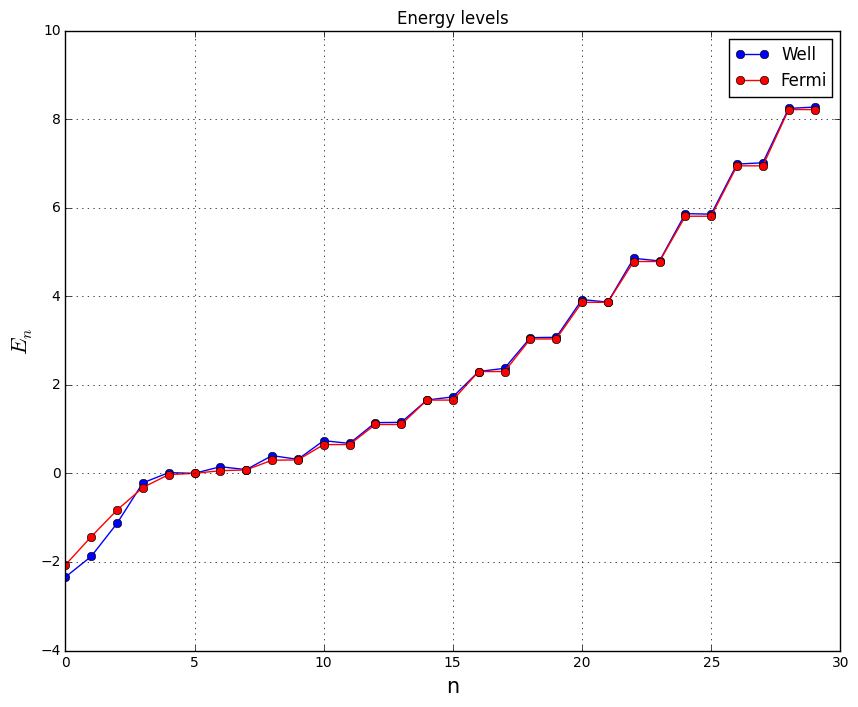

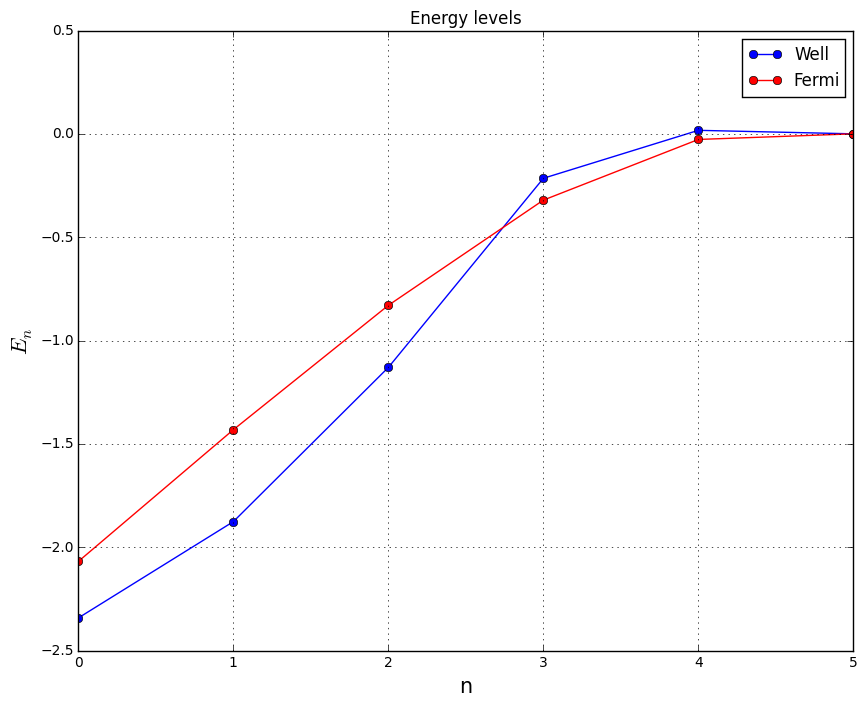

In [7]:
from __future__ import print_function,division

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

data = np.loadtxt('data/energies_nlev30_nx1024.dat')
data2 = np.loadtxt('data_fermi/energies_nlev30_nx1024.dat')

#print(data.shape,data.shape[0]/nx)

plt.figure(figsize=[10.,8.])
plt.title('Energy levels')
plt.xlabel('n',fontsize=15)
plt.ylabel(r'$E_n$',fontsize=16)

plt.grid(True)

plt.plot(data[:,0],data[:,1],color='b',marker='o',label='Well')
plt.plot(data2[:,0],data2[:,1],color='r',marker='o',label='Fermi')

plt.legend(loc='best')
plt.show()
plt.close('all')

plt.figure(figsize=[10.,8.])
plt.title('Energy levels')
plt.xlim([0.,5.])
plt.ylim([-2.5,0.5])
plt.xlabel('n',fontsize=15)
plt.ylabel(r'$E_n$',fontsize=16)

plt.grid(True)

plt.plot(data[:,0],data[:,1],color='b',marker='o',label='Well')
plt.plot(data2[:,0],data2[:,1],color='r',marker='o',label='Fermi')

plt.legend(loc='best')
plt.show()

## Fermi potential

(30, 2) 0.029296875


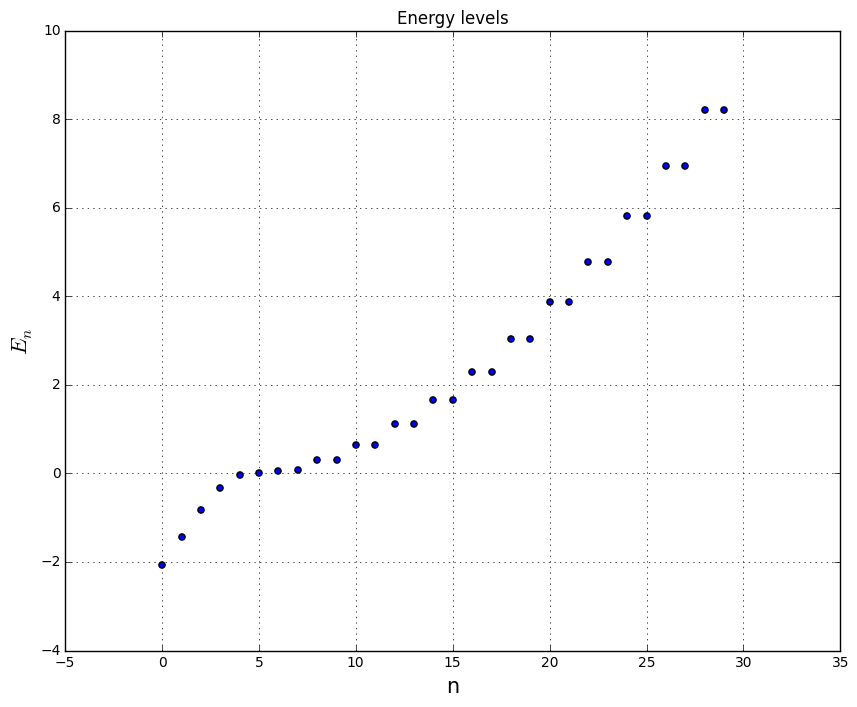

In [25]:
from __future__ import print_function,division

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

data = np.loadtxt('data_fermi/energies_nlev30_nx1024.dat')

print(data.shape,data.shape[0]/nx)

plt.figure(figsize=[10.,8.])
plt.title('Energy levels')
plt.xlabel('n',fontsize=15)
plt.ylabel(r'$E_n$',fontsize=16)

plt.grid(True)

plt.scatter(data[:,0],data[:,1])

plt.legend(loc='best')
plt.show()

# Examples of wavefunctions

Results of computations for nlevels = 30.

## Finite well

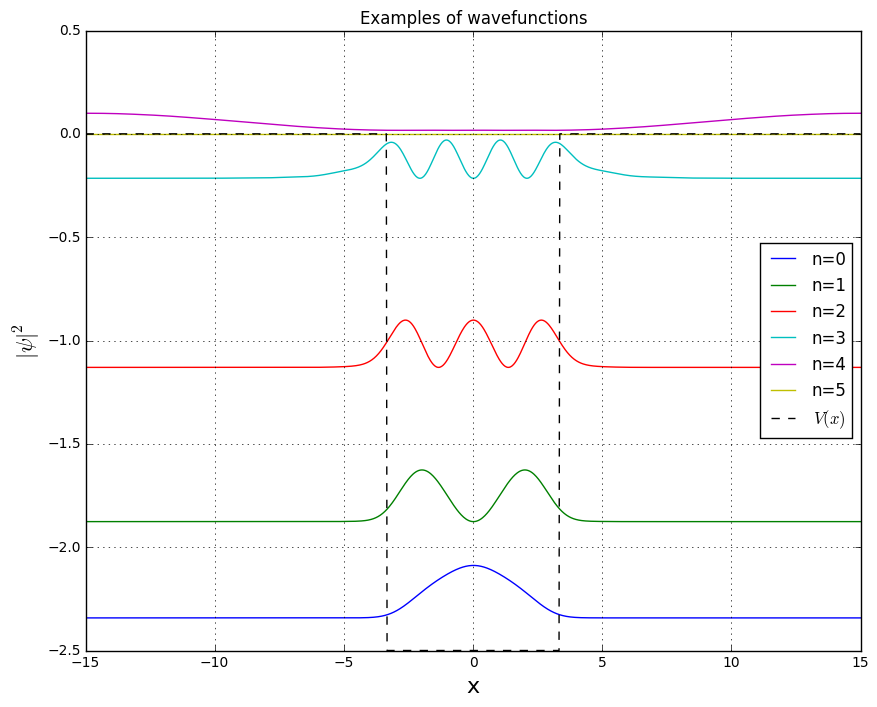

In [17]:
nlevels = 30
nx = 1024
xmin = -15.
xmax =  15.
x = np.linspace(xmin,xmax,nx,endpoint=True)
energies = np.loadtxt('data/energies_nlev30_nx1024.dat')[:,1]

def potential(x,a,V0):
    ret = np.zeros(len(x))
    ret[np.where(np.abs(x) < a)] = V0
    return ret

plt.figure(figsize=[10.,8.])
plt.title('Examples of wavefunctions')
plt.xlabel('x',fontsize=16)
plt.ylabel(r'$\vert\psi\vert^2$',fontsize=16)
plt.grid(True)

for ii in range(6):
    data = np.memmap('data/psi_{}_nlev{}_nx1024.bin'.format(ii,nlevels),dtype=np.complex128)
    psi = np.abs(data)**2 + energies[ii]
    plt.plot(x,psi,label='n={}'.format(ii))

plt.plot(x,potential(x,10./3.,-2.5),linestyle='--',label=r'$V(x)$')
plt.legend(loc='best')
plt.show()

## Fermi potential

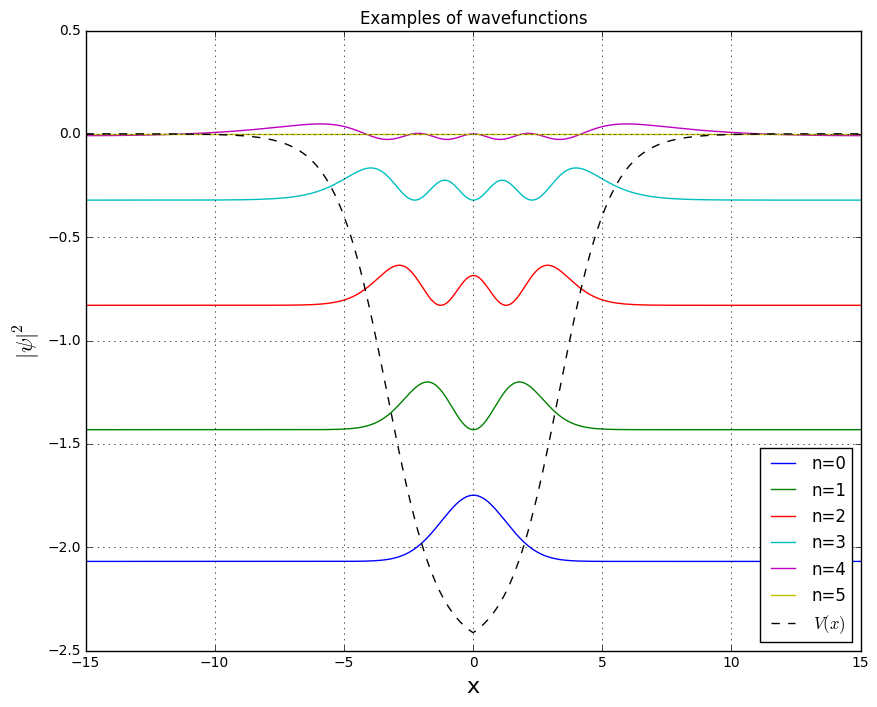

In [28]:
nlevels = 30
nx = 1024
xmin = -15.
xmax =  15.
x = np.linspace(xmin,xmax,nx,endpoint=True)
energies = np.loadtxt('data_fermi/energies_nlev30_nx1024.dat')[:,1]

def potential(x,a,V0):
    return V0 / (1 + np.exp(np.abs(x)-a))

plt.figure(figsize=[10.,8.])
plt.title('Examples of wavefunctions')
plt.xlabel('x',fontsize=16)
plt.ylabel(r'$\vert\psi\vert^2$',fontsize=16)
plt.grid(True)

for ii in range(6):
    data = np.memmap('data_fermi/psi_{}_nlev{}_nx1024.bin'.format(ii,nlevels),dtype=np.complex128)
    psi = np.abs(data)**2 + energies[ii]
    plt.plot(x,psi,label='n={}'.format(ii))

plt.plot(x,potential(x,10./3.,-2.5),linestyle='--',label=r'$V(x)$')
plt.legend(loc='best')
plt.show()